## **Import Libraries**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier

## **Get Data**

In [38]:
data = pd.read_csv('datasets/train_radiomics_hipocamp.csv', na_filter=False)
test = pd.read_csv('datasets/test_radiomics_hipocamp.csv', na_filter=False)
occ = pd.read_csv('datasets/train_radiomics_occipital_CONTROL.csv', na_filter=False)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 2181 entries, ID to Transition
dtypes: float64(2014), int64(147), object(20)
memory usage: 5.1+ MB


In [28]:
test.info()

In [29]:
occ.info()

## **Análise de Dados**

### **Compreensão dos Dados**

#### Missing Values

In [40]:
print(data.isnull().sum())  # Para o dataset de treino

ID                                  0
Image                               0
Mask                                0
diagnostics_Versions_PyRadiomics    0
diagnostics_Versions_Numpy          0
                                   ..
lbp-3D-k_ngtdm_Contrast             0
lbp-3D-k_ngtdm_Strength             0
Sex                                 0
Age                                 0
Transition                          0
Length: 2181, dtype: int64


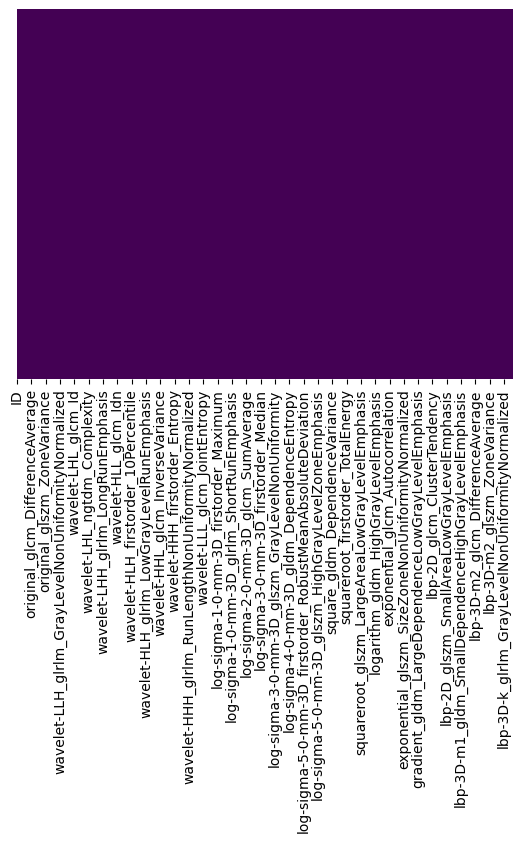

In [42]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [43]:
print(test.isnull().sum())  # Para o dataset de teste

ID                                  0
Image                               0
Mask                                0
diagnostics_Versions_PyRadiomics    0
diagnostics_Versions_Numpy          0
                                   ..
lbp-3D-k_ngtdm_Complexity           0
lbp-3D-k_ngtdm_Contrast             0
lbp-3D-k_ngtdm_Strength             0
Sex                                 0
Age                                 0
Length: 2180, dtype: int64


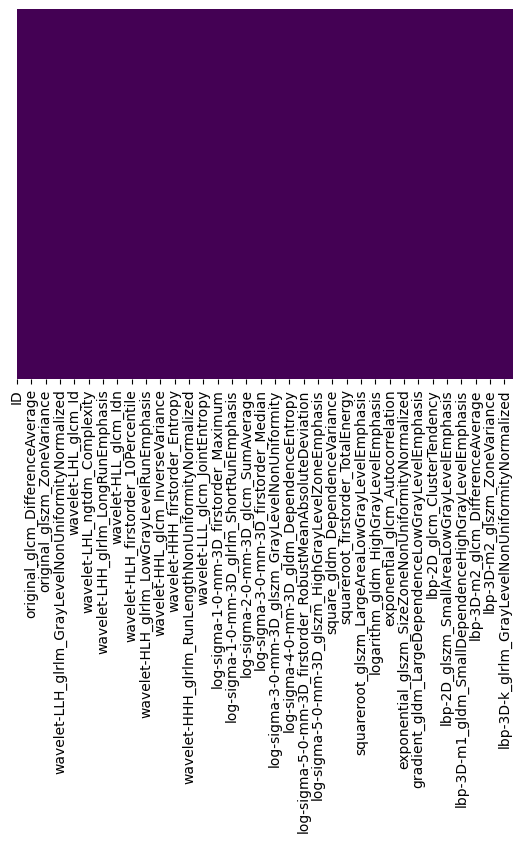

In [44]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

Não há missing values, tanto no dataset de treino como no de teste.

In [46]:
print(occ.isnull().sum())  # Para o dataset de Controlo

ID                                  0
Image                               0
Mask                                0
diagnostics_Versions_PyRadiomics    0
diagnostics_Versions_Numpy          0
                                   ..
lbp-3D-k_ngtdm_Contrast             0
lbp-3D-k_ngtdm_Strength             0
Sex                                 0
Age                                 0
Transition                          0
Length: 2181, dtype: int64


In [31]:
sns.heatmap(occ.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

O dataset de controlo também não tem missing values.

#### Linhas Duplicadas

In [47]:
# Verificar se há linhas duplicadas
duplicated_rows = data[data.duplicated()]

if not duplicated_rows.empty:
    print(f"Número de linhas duplicadas no data: {duplicated_rows.shape[0]}")
    print("Exemplo de linhas duplicadas no data:")
    print(duplicated_rows.head())
else:
    print("Nenhuma linha duplicada encontrada no data.")


Nenhuma linha duplicada encontrada no data.


In [48]:
# Verificar se há linhas duplicadas
duplicated_rows = test[test.duplicated()]

if not duplicated_rows.empty:
    print(f"Número de linhas duplicadas no test: {duplicated_rows.shape[0]}")
    print("Exemplo de linhas duplicadas no test:")
    print(duplicated_rows.head())
else:
    print("Nenhuma linha duplicada encontrada no test.")


Nenhuma linha duplicada encontrada no test.


In [49]:
# Verificar se há linhas duplicadas
duplicated_rows = occ[occ.duplicated()]

if not duplicated_rows.empty:
    print(f"Número de linhas duplicadas no occ: {duplicated_rows.shape[0]}")
    print("Exemplo de linhas duplicadas no occ:")
    print(duplicated_rows.head())
else:
    print("Nenhuma linha duplicada encontrada no occ.")


Nenhuma linha duplicada encontrada no occ.


#### Tipo de Valores

In [37]:
# Contar colunas categóricas e numéricas
num_categoricals = len(data.select_dtypes(include=['object', 'category']).columns)
num_numericals = len(data.select_dtypes(include=['number']).columns)

print(f"Número de colunas categóricas no data: {num_categoricals}")
print(f"Número de colunas numéricas no data: {num_numericals}")

Número de colunas categóricas no data: 20
Número de colunas numéricas no data: 2161


In [41]:
# Contar colunas categóricas e numéricas
num_categoricals = len(test.select_dtypes(include=['object', 'category']).columns)
num_numericals = len(test.select_dtypes(include=['number']).columns)

print(f"Número de colunas categóricas no test: {num_categoricals}")
print(f"Número de colunas numéricas no test: {num_numericals}")

Número de colunas categóricas no test: 19
Número de colunas numéricas no test: 2161


In [45]:
# Contar colunas categóricas e numéricas
num_categoricals = len(occ.select_dtypes(include=['object', 'category']).columns)
num_numericals = len(occ.select_dtypes(include=['number']).columns)

print(f"Número de colunas categóricas no occ: {num_categoricals}")
print(f"Número de colunas numéricas no occ: {num_numericals}")

Número de colunas categóricas no occ: 20
Número de colunas numéricas no occ: 2161


### **Visualização dos Dados**

Para o data obtemos os seguintes dados relativos às transições de estado:

C:\Users\rafaa\AppData\Local\Temp\ipykernel_11328\1297427363.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


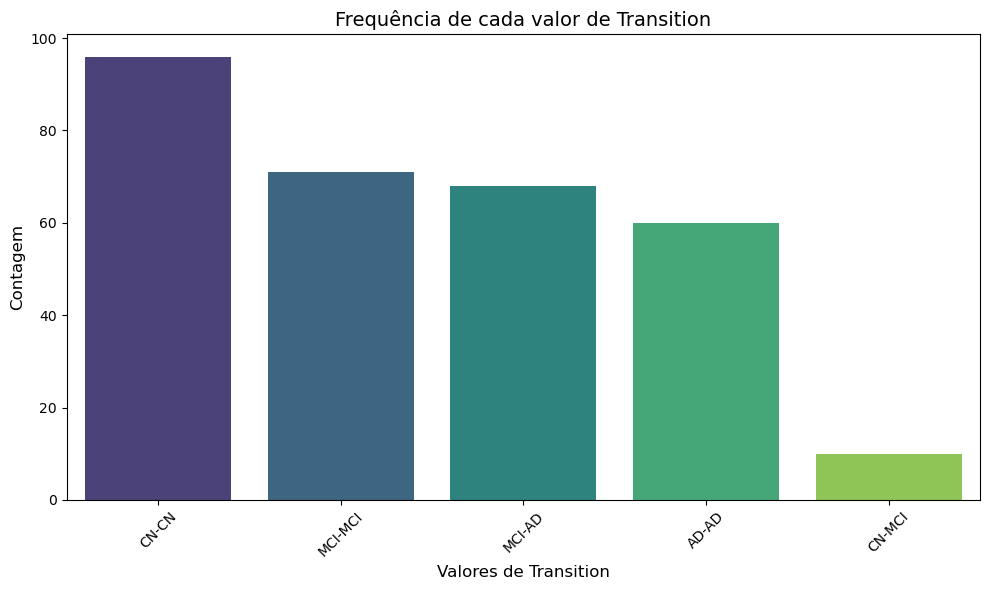

In [59]:
# Contar a frequência de cada valor em 'Transition'
transition_counts = data['Transition'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x=transition_counts.index,
    y=transition_counts.values,
    palette='viridis'  # Escolher uma paleta de cores para diferenciar os valores
)

# Adicionar rótulos e título
plt.xlabel('Valores de Transition', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.title('Frequência de cada valor de Transition', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

No de controlo:

C:\Users\rafaa\AppData\Local\Temp\ipykernel_11328\1207354877.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


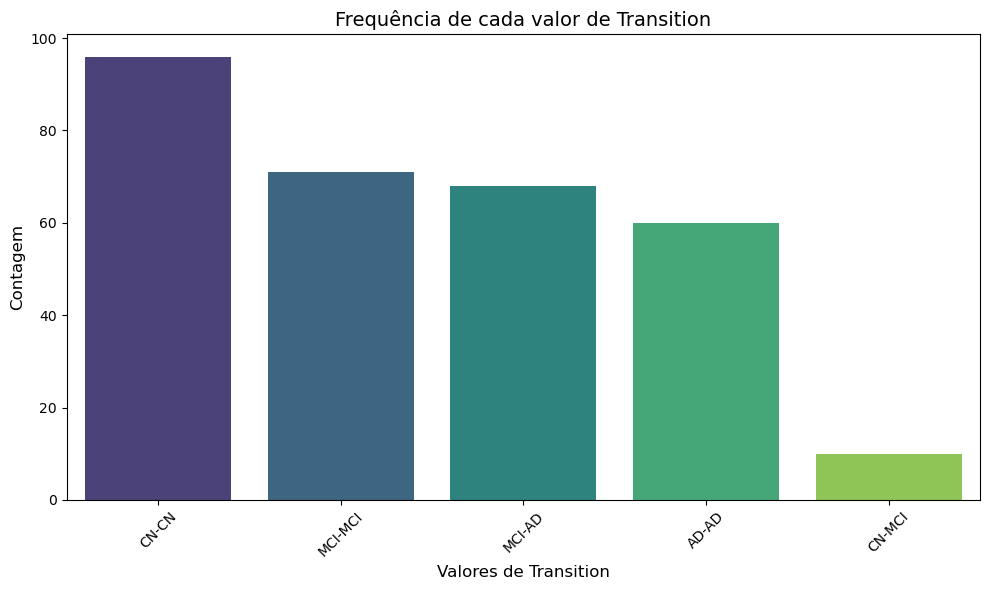

In [51]:
# Contar a frequência de cada valor em 'Transition'
transition_counts = occ['Transition'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x=transition_counts.index,
    y=transition_counts.values,
    palette='viridis'  # Escolher uma paleta de cores para diferenciar os valores
)

# Adicionar rótulos e título
plt.xlabel('Valores de Transition', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.title('Frequência de cada valor de Transition', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

### **Relações Entre Atributos**

#### Transition - Idade

C:\Users\rafaa\AppData\Local\Temp\ipykernel_11328\2569242021.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transition', y='Age', data=data, palette='Set2')


<Figure size 1000x600 with 0 Axes>

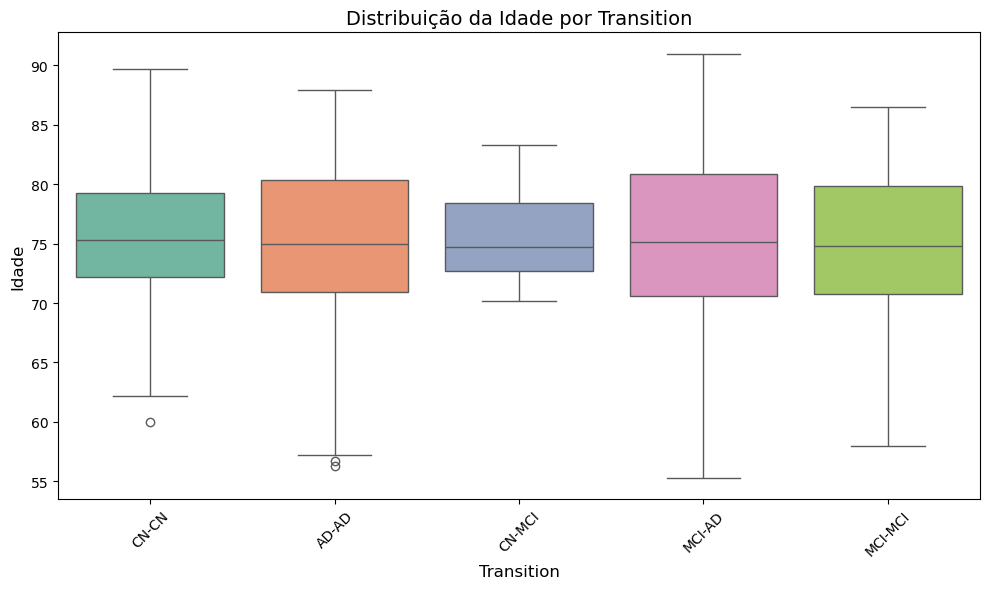

In [53]:
## Criar o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transition', y='Age', data=data, palette='Set2')

# Adicionar rótulos e título
plt.xlabel('Transition', fontsize=12)
plt.ylabel('Idade', fontsize=12)
plt.title('Distribuição da Idade por Transition', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


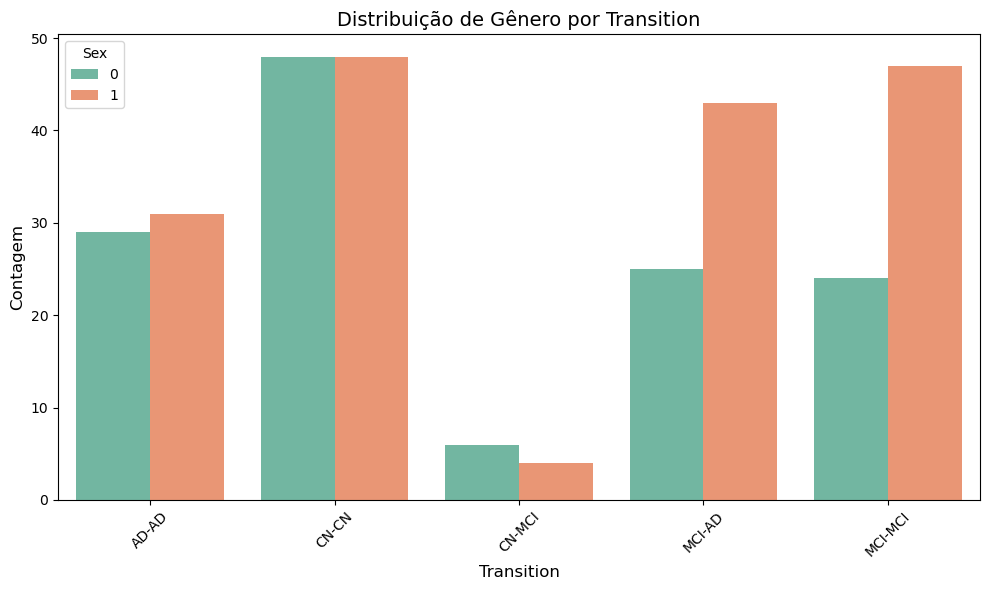


Diferença percentual entre os gêneros para cada Transition:
Para Transition AD-AD:
 - Homens: 48.33%
 - Mulheres: 51.67%
 - Diferença: 3.33%
Para Transition CN-CN:
 - Homens: 50.00%
 - Mulheres: 50.00%
 - Diferença: 0.00%
Para Transition CN-MCI:
 - Homens: 60.00%
 - Mulheres: 40.00%
 - Diferença: 20.00%
Para Transition MCI-AD:
 - Homens: 36.76%
 - Mulheres: 63.24%
 - Diferença: 26.47%
Para Transition MCI-MCI:
 - Homens: 33.80%
 - Mulheres: 66.20%
 - Diferença: 32.39%


In [58]:
# Contar os valores agrupados por Transition e Gênero
grouped_counts = data.groupby(['Transition', 'Sex']).size().reset_index(name='Count')

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Transition', y='Count', hue='Sex', data=grouped_counts, palette='Set2')

# Adicionar rótulos e título
plt.xlabel('Transition', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.title('Distribuição de Gênero por Transition', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

# Calcular as porcentagens e exibir no console
print("\nDiferença percentual entre os gêneros para cada Transition:")
transitions = grouped_counts['Transition'].unique()
for transition in transitions:
    sub_data = grouped_counts[grouped_counts['Transition'] == transition]
    if len(sub_data) == 2:  # Certifique-se de que há dois gêneros para comparação
        0_count = sub_data[sub_data['Sex'] == 0]['Count'].values[0]
        fe0_count = sub_data[sub_data['Sex'] == 1]['Count'].values[0]
        total = 0_count + fe0_count
        male_percentage = (0_count / total) * 100
        female_percentage = (fe0_count / total) * 100
        diff = abs(male_percentage - female_percentage)
        print(f"Para Transition {transition}:")
        print(f" - Homens: {male_percentage:.2f}%")
        print(f" - Mulheres: {female_percentage:.2f}%")
        print(f" - Diferença: {diff:.2f}%")


## **Tratamento de Dados**

### **ID**

In [7]:
data['ID'] = pd.factorize(data['ID'])[0] + 1
test['ID'] = pd.factorize(test['ID'])[0] + 1

Verificamos então que não há missing values.

In [10]:
data.nunique()

ID                                  305
Image                               305
Mask                                305
diagnostics_Versions_PyRadiomics      1
diagnostics_Versions_Numpy            1
                                   ... 
lbp-3D-k_ngtdm_Contrast             305
lbp-3D-k_ngtdm_Strength             305
Sex                                   2
Age                                 184
Transition                            5
Length: 2181, dtype: int64

Existem algumas colunas que tem sempre o mesmo valor, o que não acrescente valor ao dataset, logo, vamos removê-las.

In [11]:
apagar = data.columns[data.nunique() == 1]
apagar2 = test.columns[test.nunique() == 1]

data = data.drop(columns=apagar)
test = test.drop(columns=apagar2)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 2022 entries, ID to Transition
dtypes: float64(1994), int64(20), object(8)
memory usage: 4.7+ MB


In [13]:
# Remover todas as colunas do tipo object, exceto 'Transition'
colunas_numericas = data.select_dtypes(include=['number']).columns.tolist()

test = test[colunas_numericas]
# Adicionar a coluna 'transition' às colunas numéricas
if 'Transition' in data.columns:
    colunas_numericas.append('Transition')
data = data[colunas_numericas]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 2015 entries, ID to Transition
dtypes: float64(1994), int64(20), object(1)
memory usage: 4.7+ MB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 2014 entries, ID to Age
dtypes: float64(1991), int64(23)
memory usage: 1.5 MB


Passar Age a inteiro

In [16]:
data['Age'] = data['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

Correlação

In [17]:
from sklearn.preprocessing import LabelEncoder

# Codificar a coluna 'Transition'
label_encoder = LabelEncoder()
data['Transition_encoded'] = label_encoder.fit_transform(data['Transition'])

# Calcular a matriz de correlação apenas com colunas numéricas
correlation_matrix = data.select_dtypes(include=['number']).corr()

# Correlação com a coluna codificada 'Transition_encoded'
correlation_with_target = correlation_matrix['Transition_encoded'].sort_values(ascending=False)

print("Correlação com Transition_encoded:\n", correlation_with_target)

# Remover a coluna 'Transition_encoded' do DataFrame
data.drop(columns=['Transition_encoded'], inplace=True)


Correlação com Transition_encoded:
 Transition_encoded                                               1.000000
log-sigma-3-0-mm-3D_glcm_Idmn                                    0.177675
log-sigma-3-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis    0.174013
wavelet-HHL_glcm_ClusterShade                                    0.167051
log-sigma-4-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis    0.163168
                                                                   ...   
log-sigma-4-0-mm-3D_gldm_SmallDependenceLowGrayLevelEmphasis    -0.162578
original_glszm_SizeZoneNonUniformity                            -0.162671
lbp-3D-k_gldm_SmallDependenceLowGrayLevelEmphasis               -0.167414
log-sigma-3-0-mm-3D_gldm_SmallDependenceLowGrayLevelEmphasis    -0.169071
wavelet-HHL_firstorder_Median                                   -0.183041
Name: Transition_encoded, Length: 2015, dtype: float64


In [18]:
# Definir o limite para baixa correlação
correlation_threshold = 0.1

# Identificar colunas com baixa correlação
low_correlation_cols = correlation_with_target[abs(correlation_with_target) < correlation_threshold].index

# Garantir que a coluna 'ID' não seja removida
low_correlation_cols = [col for col in low_correlation_cols if col != 'ID']

# Remover colunas com baixa correlação
#data.drop(columns=low_correlation_cols, inplace=True)
##test.drop(columns=low_correlation_cols, inplace=True)

print(f"Colunas removidas devido à baixa correlação: {list(low_correlation_cols)}")


Colunas removidas devido à baixa correlação: ['wavelet-LHL_firstorder_Minimum', 'lbp-3D-k_glszm_SmallAreaEmphasis', 'original_glszm_LargeAreaLowGrayLevelEmphasis', 'wavelet-HHH_gldm_LargeDependenceHighGrayLevelEmphasis', 'lbp-3D-k_glszm_SmallAreaHighGrayLevelEmphasis', 'wavelet-HLL_glrlm_RunVariance', 'squareroot_glcm_Autocorrelation', 'squareroot_gldm_HighGrayLevelEmphasis', 'wavelet-HHL_glrlm_LongRunEmphasis', 'wavelet-LLH_gldm_LargeDependenceHighGrayLevelEmphasis', 'wavelet-LLH_glcm_Contrast', 'squareroot_gldm_LargeDependenceHighGrayLevelEmphasis', 'log-sigma-5-0-mm-3D_firstorder_Kurtosis', 'wavelet-HLH_glrlm_LongRunEmphasis', 'log-sigma-2-0-mm-3D_glszm_SmallAreaEmphasis', 'log-sigma-3-0-mm-3D_glrlm_ShortRunHighGrayLevelEmphasis', 'squareroot_glcm_JointAverage', 'squareroot_glcm_SumAverage', 'lbp-2D_gldm_LargeDependenceHighGrayLevelEmphasis', 'lbp-3D-m1_gldm_LargeDependenceEmphasis', 'lbp-2D_gldm_LargeDependenceLowGrayLevelEmphasis', 'lbp-3D-m1_gldm_LargeDependenceLowGrayLevelEmphas

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 2015 entries, ID to Transition
dtypes: float64(1993), int32(1), int64(20), object(1)
memory usage: 4.7+ MB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 2014 entries, ID to Age
dtypes: float64(1990), int32(1), int64(23)
memory usage: 1.5 MB


In [21]:
data.to_csv("ds_novo/dataset_treino.csv", index=False)
test.to_csv("ds_novo/dataset_teste.csv", index=False)